# ​📩 Système Intelligent de Filtrage des Emails pour la Sécurité des Communications​

# 📔​✅​ Bibliothéque

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

#NLTK (Natural Language Toolkit)
from nltk.tokenize import wordpunct_tokenize

#pour stopwords 
from nltk.corpus import stopwords
nltk.download('stopwords')

#pour la ponctuation : string.punctuation
import string
# test et entrainment 
from sklearn.model_selection import train_test_split

# DecisionTree
from sklearn.tree import DecisionTreeClassifier
 # Naïve Bayes pour données textuelles
from sklearn.naive_bayes import MultinomialNB 
# Support Vector Classifier


from sklearn.svm import SVC       
# pour la matrice de confusion             
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ULTRAPC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Analyse exploratoire des données (EDA)


* Importation des données

In [3]:
df = pd.read_csv('DataSet_Emails.csv')

# le titre de chaque column
print(df.columns.tolist())

# La taille des donnés
print(f'il exist {df.shape[0]} ligne et {df.shape[1]} columns')


['Unnamed: 0', 'message_id', 'text', 'label', 'label_text', 'subject', 'message', 'date']
il exist 31716 ligne et 8 columns


In [4]:
# le type des data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB
None


* Identification des valeurs manquantes et des doublons

In [5]:
#les Doublons
print(f'Il exist {df.duplicated().sum()} doublons')
#le manquantes
print('les Valeur Manquant sont :')
print(df.isnull().sum())

Il exist 0 doublons
les Valeur Manquant sont :
Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64


* la suppression des valeur manquants

In [6]:
print(f'il exist {df.shape[0]} ligne et {df.shape[1]} columns')
df = df.dropna()
print(f'il exist {df.shape[0]} ligne et {df.shape[1]} columns')
df.head()

il exist 31716 ligne et 8 columns
il exist 31148 ligne et 8 columns


,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


* La distribution Des spam et non Spam 

Le nombre des spam et non-spam
label_text
spam    15645
ham     15503
Name: count, dtype: int64


<Axes: title={'center': 'Distribution des spams vs ham'}, xlabel='label_text'>

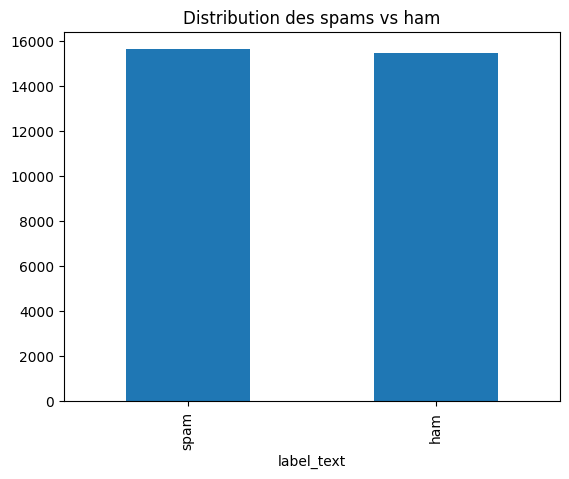

In [7]:
# Distribution des labels

print('Le nombre des spam et non-spam')
print(df['label_text'].value_counts())
df['label_text'].value_counts().plot(kind='bar', title="Distribution des spams vs ham")

* Matrice de corrélation 

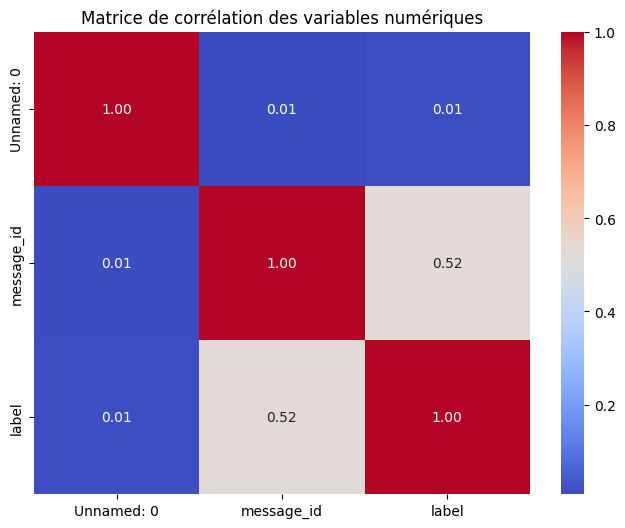

In [8]:
df_numerique = df.select_dtypes(include='number')
corr= df_numerique.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables numériques")
plt.show()


* 😶‍🌫️​ Création de nuage pour les mots fréquents dans les spams et un autre pour les emails légitimes (ham).

* ​ Dans votre cas, le nuage de mots permet de voir quels mots apparaissent le plus souvent dans les messages spam par rapport aux messages légitimes (ham).
* Les mots les plus gros sont les plus fréquents
* Les messages ham pourraient montrer des mots plus personnels ou conversationnels

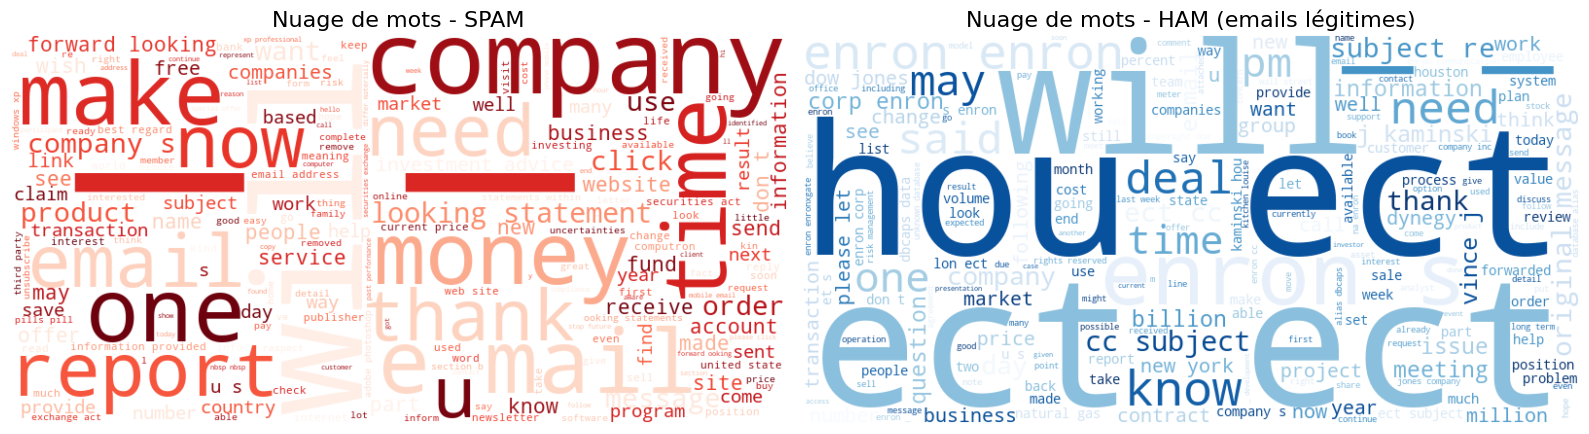

In [9]:
# Créer les nuages de mots

spam_text = " ".join(df[df['label_text'] == 'spam']['message'])
ham_text = " ".join(df[df['label_text'] == 'ham']['message'])

wordcloud_spam = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_text)
wordcloud_ham = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_text)


plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots - SPAM", fontsize=16)


plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots - HAM (emails légitimes)", fontsize=16)

plt.tight_layout()
plt.show()


# 2.Prétraitement du texte 

* Appliquer la tokenisation : nltk.word_tokenize(text).
* Tokenisation :Cela découpe le texte brut en mots individuels 

* supprimer les column innutile

In [10]:
df = df.drop(columns=['message_id','Unnamed: 0' ,'subject' , 'message' , 'date'] , axis = 1)
# pour renommer une colomn 
#df = df.rename(columns={'label': 'NouveauNom'})



In [11]:
# Appliquer la tokenization

df["text_tokens"] = df["text"].apply(lambda x: wordpunct_tokenize(str(x)) )
    
# Afficher le résultat
print(list(df.columns))
df.head()

['text', 'label', 'label_text', 'text_tokens']


,text,label,label_text,text_tokens
0,any software just for 15 $ - 99 $ understandin...,1,spam,"[any, software, just, for, 15, $, -, 99, $, un..."
1,perspective on ferc regulatory action client c...,0,ham,"[perspective, on, ferc, regulatory, action, cl..."
2,wanted to try ci 4 lis but thought it was way ...,1,spam,"[wanted, to, try, ci, 4, lis, but, thought, it..."
3,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"[enron, /, hpl, actuals, for, december, 11, ,,..."
4,looking for cheap high - quality software ? ro...,1,spam,"[looking, for, cheap, high, -, quality, softwa..."


* Supprimer les stopwords (mots vides) avec nltk.corpus.stopwords.words('english').

In [12]:
print(f"le nombre de caracter avant Stop words {len(df['text_tokens'][1])}")
english_stopwords = set(stopwords.words('english'))
# Enlevant les mots vides

df["text_tokens"] = df["text_tokens"].apply(
    lambda x: [mot for mot in x 
                          if mot.lower() not in english_stopwords])

print(f"le nombre de caracter Apres Stop words {len(df['text_tokens'][1])}")

le nombre de caracter avant Stop words 239
le nombre de caracter Apres Stop words 187


* Supprimer la ponctuation et les caractères spéciaux à l’aide de re.sub() ou string.punctuation. 

In [13]:

df['cleaned_tokens'] = df['text_tokens'].apply(
    lambda tokens: [t for t in tokens 
                        if t not in string.punctuation])
print(len(df['cleaned_tokens'][1]))

139


* Appliquer le stemming avec PorterStemmer() de NLTK pour réduire les mots à leur racine.

In [14]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['cleaned_tokens'] = df['cleaned_tokens'].apply(
    lambda tokens: [stemmer.stem(t.lower()) for t in tokens]
)


In [15]:
print(df['cleaned_tokens'][1])
df

['perspect', 'ferc', 'regulatori', 'action', 'client', 'conf', 'call', 'today', 'jun', 'e', '19', 'th', '2', '00', 'pm', 'edt', 'perspect', 'ferc', 'regulatori', 'action', 'client', 'confer', 'call', 'today', 'tuesday', 'june', '19', 'th', '2', '00', 'pm', 'edt', 'host', 'ray', 'nile', 'power', 'natur', 'ga', 'analyst', 'speaker', 'steve', 'bergstrom', 'presid', 'coo', 'dynegi', 'steve', 'bergstrom', 'presid', 'chief', 'oper', 'offic', 'dynegi', 'join', 'us', '2', '00', 'p', 'today', 'confer', 'call', 'discuss', 'recent', 'ferc', 'action', 'impos', 'price', 'control', 'west', 'discuss', 'follow', 'q', 'question', 'explor', 'includ', 'implic', 'ferc', 'action', 'dyn', 'industri', 'whole', 'earn', 'impact', 'risk', 'regul', 'whatev', 'els', 'mind', 'attach', 'two', 'recent', 'note', 'ferc', 'action', 'refer', 'call', 'replay', 'reserv', '800', '229', '0281', 'us', '800', '642', '1687', 'us', '1073259', '706', '645', '9237', 'int', 'l', '706', '645', '9291', 'int', 'l', 'replay', '6', '22

,text,label,label_text,text_tokens,cleaned_tokens
0,any software just for 15 $ - 99 $ understandin...,1,spam,"[software, 15, $, -, 99, $, understanding, oem...","[softwar, 15, 99, understand, oem, softwar, le..."
1,perspective on ferc regulatory action client c...,0,ham,"[perspective, ferc, regulatory, action, client...","[perspect, ferc, regulatori, action, client, c..."
2,wanted to try ci 4 lis but thought it was way ...,1,spam,"[wanted, try, ci, 4, lis, thought, way, expens...","[want, tri, ci, 4, li, thought, way, expens, v..."
3,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"[enron, /, hpl, actuals, december, 11, ,, 2000...","[enron, hpl, actual, decemb, 11, 2000, teco, t..."
4,looking for cheap high - quality software ? ro...,1,spam,"[looking, cheap, high, -, quality, software, ?...","[look, cheap, high, qualiti, softwar, rotat, n..."
...,...,...,...,...,...
31711,"credit netco start up plan louise ,\nattached ...",0,ham,"[credit, netco, start, plan, louise, ,, attach...","[credit, netco, start, plan, louis, attach, el..."
31712,"everything you are looking for hello , visit o...",1,spam,"[everything, looking, hello, ,, visit, amazing...","[everyth, look, hello, visit, amaz, onlin, sho..."
31713,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,0,ham,"[start, date, :, 2, /, 5, /, 02, ;, hourahead,...","[start, date, 2, 5, 02, hourahead, hour, 18, s..."
31714,corhshucker daren - - - -\nthe invoices are be...,0,ham,"[corhshucker, daren, -, -, -, -, invoices, pai...","[corhshuck, daren, invoic, paid, us, jame, arm..."


# 3.Extraction des caractéristiques

* Vectoriser le texte à l’aide de TfidfVectorizer() ou CountVectorizer()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['text_ready'] = df['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialiser le vectoriseur
tfidf = TfidfVectorizer(max_features=5000)

X_tfidf = tfidf.fit_transform(df['text_ready'])

df_bow = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

colonnes_non_numeriques = [col for col in df_bow.columns if not col.isdigit()]
df_bow_filtre = df_bow[colonnes_non_numeriques]

df_bow_filtre




,aa,ab,abacha,abandon,abb,abel,abiiiti,abil,abl,abroad,...,zealand,zero,zhiyong,zimbabw,zimin,zip,zone,zonedubai,zu,zyban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Définir X à partir des variables sélectionnées. 


In [35]:
X = df_bow_filtre 
y = df['label'] 

* Diviser les données en ensemble d’entraînement et de test à l’aide de train_test_split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=42, stratify=y)

# 4.Entraînement de plusieurs modèles de classification

* Decision Tree classifier 

* Naïve Bayes classifier 


* Support Vector Class


In [ ]:


models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', random_state=42)  # Kernel linéaire pour la simplicité
}



=== Decision Tree ===
Accuracy: 0.9589

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3101
           1       0.96      0.96      0.96      3129

    accuracy                           0.96      6230
   macro avg       0.96      0.96      0.96      6230
weighted avg       0.96      0.96      0.96      6230



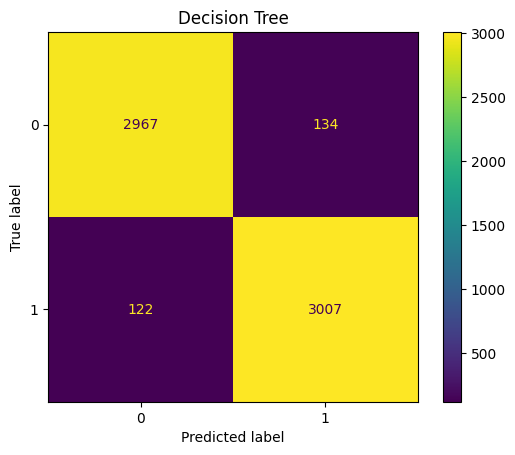


=== Naïve Bayes ===
Accuracy: 0.9835

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3101
           1       0.98      0.99      0.98      3129

    accuracy                           0.98      6230
   macro avg       0.98      0.98      0.98      6230
weighted avg       0.98      0.98      0.98      6230



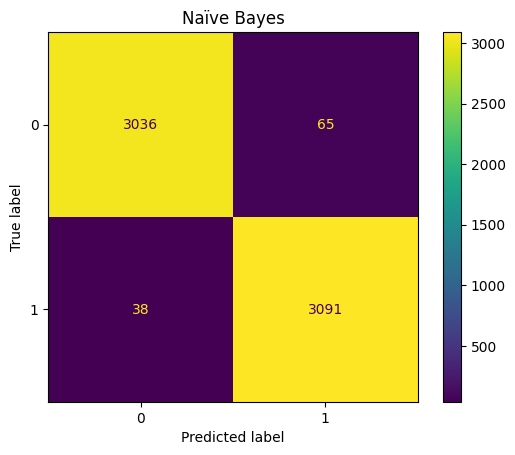


=== SVM ===
Accuracy: 0.9878

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3101
           1       0.98      0.99      0.99      3129

    accuracy                           0.99      6230
   macro avg       0.99      0.99      0.99      6230
weighted avg       0.99      0.99      0.99      6230



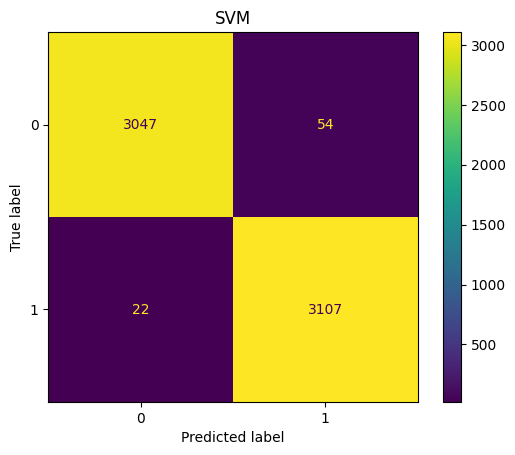

In [38]:
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédiction
    y_pred = model.predict(X_test)
    
    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Matrice de confusion (optionnel)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    disp.plot()
    plt.title(name)
    plt.show()

In [39]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Dictionnaire pour stocker les résultats
results = {}

for name, model in models.items():
    print(f"\n=== Évaluation de {name} ===")
    
    # Prédiction sur le test set
    y_pred = model.predict(X_test)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Moyenne pondérée pour les multiclasses
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Stockage des résultats
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }
    
    # Affichage des métriques
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    

# Comparaison des modèles
print("\n=== Comparaison des modèles ===")
results_df = pd.DataFrame(results).T
print(results_df)


=== Évaluation de Decision Tree ===
Accuracy: 0.9589
Precision: 0.9589
Recall: 0.9589
F1-score: 0.9589

=== Évaluation de Naïve Bayes ===
Accuracy: 0.9835
Precision: 0.9835
Recall: 0.9835
F1-score: 0.9835

=== Évaluation de SVM ===
Accuracy: 0.9878
Precision: 0.9879
Recall: 0.9878
F1-score: 0.9878

=== Comparaison des modèles ===
               Accuracy  Precision    Recall  F1-score
Decision Tree  0.958909   0.958915  0.958909  0.958908
Naïve Bayes    0.983467   0.983503  0.983467  0.983466
SVM            0.987801   0.987852  0.987801  0.987800


# 5.Évaluation des modèles

# 6.Validation croisée


# 7.Sélection et sauvegarde du meilleur modèle

# 8.Interface interactive avec Streamlit